# 데이터 로드 & 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [2]:
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std


# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size = 0.2)

# 모델 구성 및 컴파일

In [3]:
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


# 모델 학습

In [5]:
history = model.fit(
    x_train, y_train, 
    validation_data = (x_val, y_val),
    epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 1s 15ms/step - loss: 586.1131 - mae: 22.2566 - val_loss: 441.8555 - val_mae: 19.7640
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 533.0125 - mae: 21.0933 - val_loss: 396.0870 - val_mae: 18.5971
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 467.9041 - mae: 19.6289 - val_loss: 337.1906 - val_mae: 17.0019
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 382.7457 - mae: 17.5412 - val_loss: 260.9051 - val_mae: 14.7750
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 282.2810 - mae: 14.5537 - val_loss: 178.6803 - val_mae: 11.9585
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 184.1991 - mae: 11.0292 - val_loss: 111.6827 - val_mae: 9.2272
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 119.8543 - mae: 8.3016 - val_loss: 73.8232 - val_mae: 7.2082
Epoch 8/200
11/11 [=========================

11/11 [==============================] - 0s 4ms/step - loss: 9.3994 - mae: 2.2049 - val_loss: 12.9212 - val_mae: 2.5954
Epoch 63/200
11/11 [==============================] - 0s 4ms/step - loss: 9.3046 - mae: 2.1967 - val_loss: 13.0614 - val_mae: 2.5937
Epoch 64/200
11/11 [==============================] - 0s 4ms/step - loss: 9.9079 - mae: 2.3100 - val_loss: 15.6809 - val_mae: 2.8713
Epoch 65/200
11/11 [==============================] - 0s 4ms/step - loss: 9.7658 - mae: 2.3116 - val_loss: 13.7702 - val_mae: 2.6680
Epoch 66/200
11/11 [==============================] - 0s 4ms/step - loss: 9.1903 - mae: 2.2025 - val_loss: 12.8101 - val_mae: 2.5778
Epoch 67/200
11/11 [==============================] - 0s 4ms/step - loss: 9.0897 - mae: 2.1806 - val_loss: 12.4765 - val_mae: 2.5388
Epoch 68/200
11/11 [==============================] - 0s 4ms/step - loss: 9.0674 - mae: 2.1837 - val_loss: 12.8549 - val_mae: 2.5547
Epoch 69/200
11/11 [==============================] - 0s 4ms/step - loss: 8.8200 -

11/11 [==============================] - 0s 4ms/step - loss: 6.7869 - mae: 1.8955 - val_loss: 12.1673 - val_mae: 2.4879
Epoch 124/200
11/11 [==============================] - 0s 4ms/step - loss: 6.6687 - mae: 1.8794 - val_loss: 12.5609 - val_mae: 2.4970
Epoch 125/200
11/11 [==============================] - 0s 4ms/step - loss: 6.6631 - mae: 1.8785 - val_loss: 12.2694 - val_mae: 2.4889
Epoch 126/200
11/11 [==============================] - 0s 4ms/step - loss: 6.8649 - mae: 1.9222 - val_loss: 12.3348 - val_mae: 2.5378
Epoch 127/200
11/11 [==============================] - 0s 4ms/step - loss: 6.6019 - mae: 1.8701 - val_loss: 12.0688 - val_mae: 2.4369
Epoch 128/200
11/11 [==============================] - 0s 4ms/step - loss: 6.7780 - mae: 1.9005 - val_loss: 12.3011 - val_mae: 2.4855
Epoch 129/200
11/11 [==============================] - 0s 4ms/step - loss: 6.5008 - mae: 1.8610 - val_loss: 12.4400 - val_mae: 2.5255
Epoch 130/200
11/11 [==============================] - 0s 4ms/step - loss: 6

11/11 [==============================] - 0s 4ms/step - loss: 5.0790 - mae: 1.6319 - val_loss: 11.6036 - val_mae: 2.3873
Epoch 185/200
11/11 [==============================] - 0s 4ms/step - loss: 5.1305 - mae: 1.6432 - val_loss: 11.5792 - val_mae: 2.3807
Epoch 186/200
11/11 [==============================] - 0s 4ms/step - loss: 4.9657 - mae: 1.6254 - val_loss: 11.8491 - val_mae: 2.4285
Epoch 187/200
11/11 [==============================] - 0s 4ms/step - loss: 4.9325 - mae: 1.6051 - val_loss: 11.4731 - val_mae: 2.3863
Epoch 188/200
11/11 [==============================] - 0s 4ms/step - loss: 4.8653 - mae: 1.5896 - val_loss: 12.0811 - val_mae: 2.4146
Epoch 189/200
11/11 [==============================] - 0s 5ms/step - loss: 4.7991 - mae: 1.5825 - val_loss: 11.8981 - val_mae: 2.4277
Epoch 190/200
11/11 [==============================] - 0s 4ms/step - loss: 4.7366 - mae: 1.5668 - val_loss: 11.7139 - val_mae: 2.3758
Epoch 191/200
11/11 [==============================] - 0s 4ms/step - loss: 4

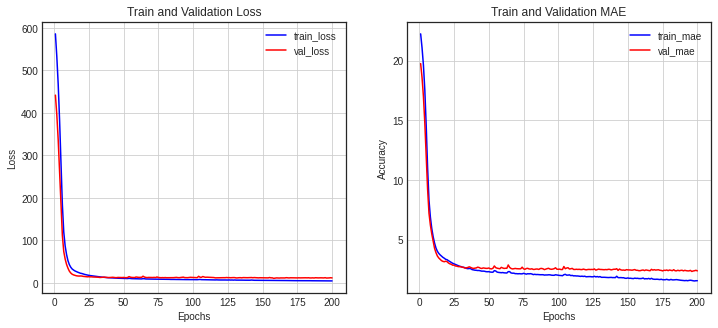

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 모델 평가 및 예측

In [7]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 20.8458 - mae: 2.8834


[20.845775604248047, 2.883370876312256]